# Projeto 4 de Álgebra Linear Numérica

### Alunos:
* Isaías Gouvêa Gonçalves
* Gustavo Luciano dos santos

### Matrizes Aleatórias

In [43]:
# Importando dependências
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [44]:
# Função para gerar matriz aleatória normal

def matrix(m, n):
    return np.random.normal(size=(m, n), loc=0, scale=1)


### Exercício ***1.a)***

Gerando um histograma das normas para vários valores de $m$



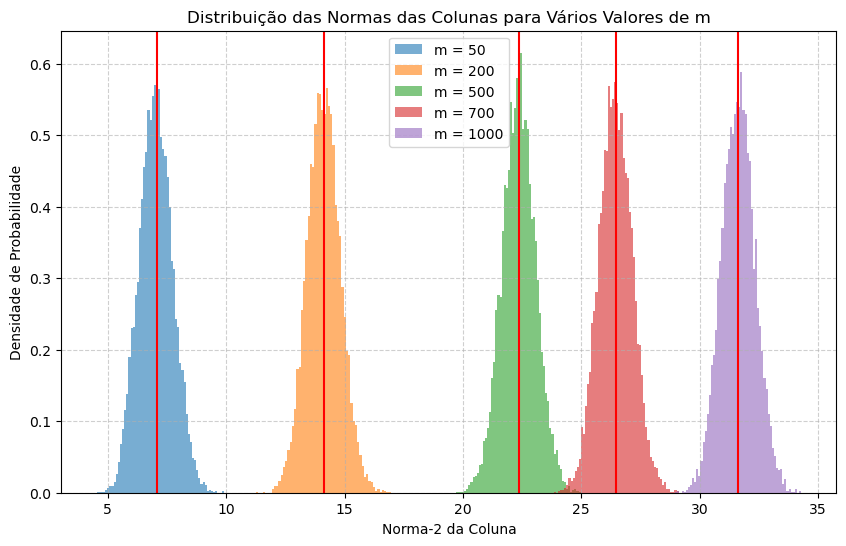

In [45]:
# Dimensões das matrizes
m_values = [ 50, 200, 500, 700, 1000]
n = 10000

# Plotando gráfico inicial
plt.figure(figsize=(10,6))

# Iterando para cada valor possível de m
for m in m_values:

   # Gerando a matriz e criando a sua lista da norma das colunas
   A = matrix(m, n)
   A_norms = []

   # Salvando a norma de cada coluna
   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))

   # Plotando o histograma das normas, e uma linha vertical da média
   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

# Detalhes a mais do plot
plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Por uma ***grande*** coincidência, matrizes aleatórias gaussianas possuem vetores cuja norma também representa uma distribuissão aproximadamente gaussiana.

Claro, na matemática não temos coincidências, e nesse caso a explicação é bem simples!
Cada elemento $A_{ij}$ de uma matriz $A_{m \times n}$ é uma variável aleatória $A_{ij} \sim \mathcal{N}(0,1)$, logo, $\mu(A_{ij}^2) = 1$.

Ora, a norma quadrada de um vetor $A_j$ nada mais é do que $||A_j||^2_2 = \sum^i A_{ij}^2$, ou seja, $\mu (||A_j||^2_2) = \sum^i 1 = m \therefore \mu (||A_j||_2) = \sqrt m$. 

As linhas vermelhas no gráfico indicam as médias $\sqrt m$ para cada quantidade de linhas testada. 

Podemos observar as distribuições melhor no gráfico abaixo:

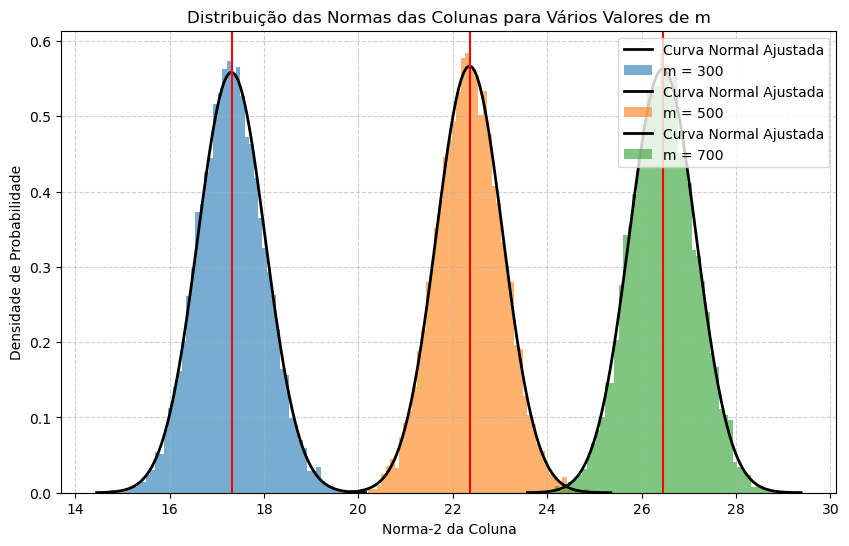

In [46]:
# Mesmo código anterior adicionando a curva normal


m_values = [300, 500, 700]
n = 10000

plt.figure(figsize=(10,6))

for m in m_values:
   A = matrix(m, n)
   A_norms = []

   for column in range(A.shape[1]):
      A_norms.append(np.linalg.norm(A[:,column]))
   
   # Aqui eu ploto uma curva normal fittada na lista de normas
   med, desv_pad = norm.fit(A_norms)
   x = np.linspace(min(A_norms), max(A_norms), 100) # Eixo de plotagem da curva
   p = norm.pdf(x, med, desv_pad)
   plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ajustada')


   plt.hist(A_norms, alpha = 0.6, label=f"m = {m}", bins=60, density=True)
   plt.axvline(x=np.sqrt(m), color = 'r')

plt.title('Distribuição das Normas das Colunas para Vários Valores de m')
plt.xlabel('Norma-2 da Coluna')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Exercício ***1.c)***

Vamos agora fazer o cálculo do valor máximo de $\dfrac{\langle \rangle}{}$